## Preparing the data

In [1]:
#import necessary packages
from imblearn.over_sampling import SMOTE
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

%matplotlib inline

In [2]:
#import data into dataframe
heart_failure_df=pd.read_csv('../data/Heart Failure Prediction - Clinical Records/heart_failure_clinical_records.csv')
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
heart_failure_df.duplicated(keep=False)

0        True
1        True
2        True
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [4]:
heart_failure_df=heart_failure_df.drop_duplicates()
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   anaemia                   1320 non-null   int64  
 2   creatinine_phosphokinase  1320 non-null   int64  
 3   diabetes                  1320 non-null   int64  
 4   ejection_fraction         1320 non-null   int64  
 5   high_blood_pressure       1320 non-null   int64  
 6   platelets                 1320 non-null   float64
 7   serum_creatinine          1320 non-null   float64
 8   serum_sodium              1320 non-null   int64  
 9   sex                       1320 non-null   int64  
 10  smoking                   1320 non-null   int64  
 11  time                      1320 non-null   int64  
 12  DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 144.4 KB


In [5]:
heart_failure_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,60.587377,0.485606,576.135606,0.446970,37.881818,0.369697,263751.982189,1.356447,136.665909,0.645455,0.307576,132.678788,0.300758
std,11.913538,0.499982,970.630878,0.497368,11.572547,0.482906,106345.010143,0.998924,4.380990,0.478557,0.461665,77.779493,0.458761
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,115.000000,0.000000,30.000000,0.000000,208000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.300000,140.000000,1.000000,1.000000,206.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [6]:
heart_failure_df.mode()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0,582,0,35,0,263358.03,1.0,134,1,0,74,0


In [7]:
heart_failure_df.median()

age                             60.00
anaemia                          0.00
creatinine_phosphokinase       249.00
diabetes                         0.00
ejection_fraction               38.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.10
serum_sodium                   137.00
sex                              1.00
smoking                          0.00
time                           119.50
DEATH_EVENT                      0.00
dtype: float64

In [8]:
heart_failure_df=heart_failure_df.astype({'age': 'uint8','anaemia': 'bool','creatinine_phosphokinase': 'int16','diabetes': 'bool','ejection_fraction': 'uint8','high_blood_pressure': 'bool','platelets': 'int32','serum_creatinine': 'float32','serum_sodium': 'uint8','sex': 'bool','smoking': 'bool','time': 'uint16','DEATH_EVENT': 'bool'})
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   uint8  
 1   anaemia                   1320 non-null   bool   
 2   creatinine_phosphokinase  1320 non-null   int16  
 3   diabetes                  1320 non-null   bool   
 4   ejection_fraction         1320 non-null   uint8  
 5   high_blood_pressure       1320 non-null   bool   
 6   platelets                 1320 non-null   int32  
 7   serum_creatinine          1320 non-null   float32
 8   serum_sodium              1320 non-null   uint8  
 9   sex                       1320 non-null   bool   
 10  smoking                   1320 non-null   bool   
 11  time                      1320 non-null   uint16 
 12  DEATH_EVENT               1320 non-null   bool   
dtypes: bool(6), float32(1), int16(1), int32(1), uint16(1), uint8(3)
memo

In [9]:
heart_failure_df.memory_usage(deep=True)

Index                       10560
age                          1320
anaemia                      1320
creatinine_phosphokinase     2640
diabetes                     1320
ejection_fraction            1320
high_blood_pressure          1320
platelets                    5280
serum_creatinine             5280
serum_sodium                 1320
sex                          1320
smoking                      1320
time                         2640
DEATH_EVENT                  1320
dtype: int64

## Exploratory Data Analysis

In [10]:
sns.set_theme(style="darkgrid", palette="pastel")

In [11]:
heart_failure_df.groupby(['DEATH_EVENT']).describe()['age'].transpose()

DEATH_EVENT,False,True
count,923.000000,397.000000
mean,58.824485,64.662469
std,10.723075,13.459326
min,40.000000,40.000000
25%,50.000000,53.000000
50%,60.000000,65.000000
75%,65.000000,72.000000
max,90.000000,95.000000


In [12]:
#KDE Intersection
def find_kde_intersections(df, feature, death_event_col='DEATH_EVENT',feature_kde_scale=1):
    feature_death_event_0 = df[df[death_event_col] == 0][feature]
    feature_death_event_1 = df[df[death_event_col] == 1][feature]

    kde_death_event_0 = gaussian_kde(feature_death_event_0)
    kde_death_event_1 = gaussian_kde(feature_death_event_1)

    x_values = np.linspace(min(df[feature]), max(df[feature]), 1000)
    y_death_event_0 = kde_death_event_0.evaluate(x_values)
    y_death_event_1 = kde_death_event_1.evaluate(x_values)

    x_intersection_points = []
    y_intersection_points = []

    for i in range(len(x_values) - 1):
        if np.sign(y_death_event_0[i] - y_death_event_1[i]) != np.sign(y_death_event_0[i + 1] - y_death_event_1[i + 1]):
            x_intersect = (x_values[i] + x_values[i + 1]) / 2
            y_intersect = (y_death_event_1[i] + y_death_event_1[i + 1]) / 2
            x_intersection_points.append(x_intersect)
            y_intersection_points.append(y_intersect * feature_kde_scale)

    return x_intersection_points, y_intersection_points, kde_death_event_0, kde_death_event_1

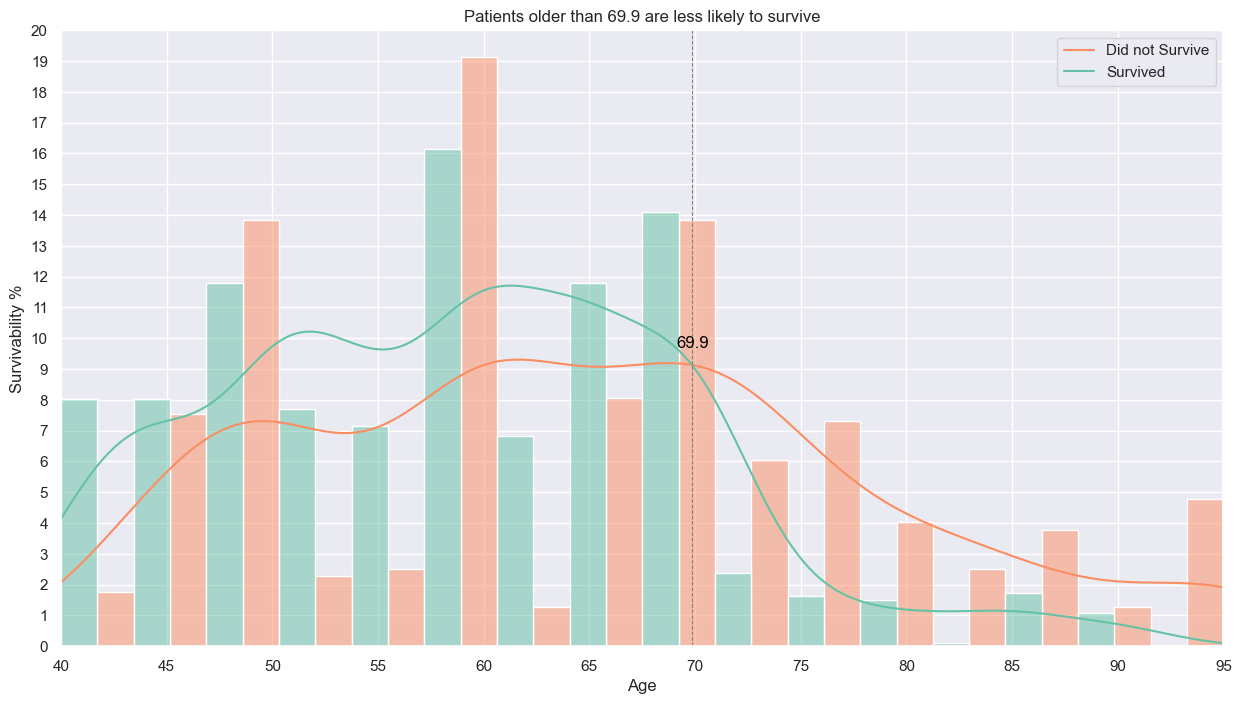

In [13]:
#age distribution
age_kde_scale = (heart_failure_df['age'].mean()*heart_failure_df['age'].std())/2
x_age_intersection_points, y_age_intersection_points, age_kde_death_event_0, age_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'age', feature_kde_scale=age_kde_scale)

plt.figure(figsize=(15,8))
plt.title('Patients older than 69.9 are less likely to survive')

sns.histplot(heart_failure_df,x='age',stat='percent',hue='DEATH_EVENT',kde=True,palette='Set2',multiple='dodge',fill=True, common_norm=False)

plt.legend(['Did not Survive','Survived'])

plt.xlabel('Age')
plt.xticks(range(40,100,5))
plt.xlim(40,95)

plt.ylabel('Survivability %')
plt.yticks(range(0,21))
plt.ylim(0,20)

for i,x_age_point in enumerate(x_age_intersection_points):
    plt.axvline(x_age_point, color='gray', linestyle='--', linewidth=0.75)
    y_age_point = y_age_intersection_points[i]
    plt.text(x_age_point, y_age_point+0.5, f'{x_age_point:.1f}', color='black', rotation=0,va='top', ha='center')
  
plt.show()

### What is Anemia?
Anemia is when you have low levels of healthy red blood cells to carry oxygen throughout your body.

### How much of our patients are Anemic?

In [14]:
#Categorization
def categorize_values(a, b,c):
    if a == 0 and b == 0:
        return f"Doesn't have {c} \n Survived"
    elif a == 0 and b == 1:
        return f"Doesn't have {c} \n Didn't Survive"
    elif a == 1 and b == 0:
        return f"Has {c} \n Survived"
    elif a == 1 and b == 1:
        return f"Has {c} \n Didn't Survive"
    else:
        return 'Undefined'

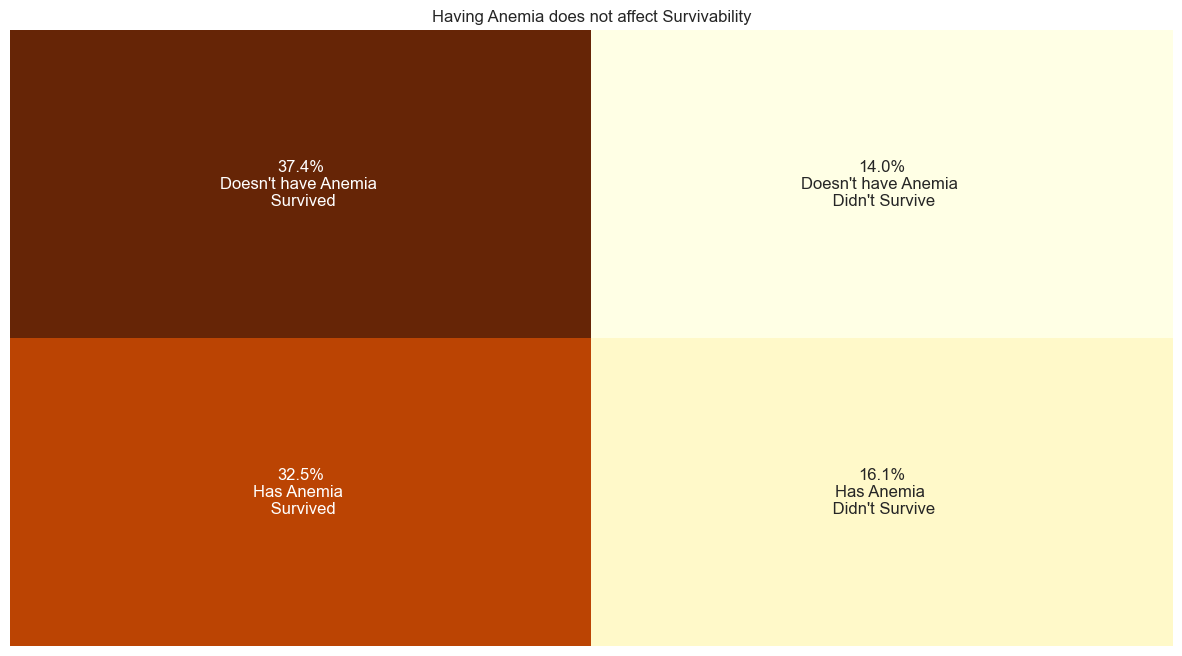

In [15]:
#anemic distribution
anemic_contingency_table=pd.crosstab(heart_failure_df['anaemia'],heart_failure_df['DEATH_EVENT']).copy()

annotations = [
    [
        '{:.1f}%\n{}'.format(anemic_contingency_table.iloc[i, j] / anemic_contingency_table.sum().sum() * 100, 
                               categorize_values(anemic_contingency_table.index[i], anemic_contingency_table.columns[j], 'Anemia'))
        for j in range(len(anemic_contingency_table.columns))
    ]
    for i in range(len(anemic_contingency_table.index))
]

plt.figure(figsize=(15,8))
plt.title('Having Anemia does not affect Survivability')

sns.heatmap(anemic_contingency_table, annot=annotations, fmt='', cmap='YlOrBr', cbar=False)

plt.xlabel('')
plt.xticks([])

plt.ylabel('')
plt.yticks([])

plt.show()

### What is Creatine Phosphokinase (CPK)?
Creatine Phosphokinase (CPK) is an enzyme that mainly exists in your heart and skeletal muscle, with small amounts in your brain.

### What Is the Normal Range of CPK Levels?
Usually, the normal range of CPK levels falls anywhere between 10 to 120 micrograms per liter (mcg/L).

### How much in our patient?

In [16]:
heart_failure_df.groupby(['DEATH_EVENT']).describe()['creatinine_phosphokinase'].transpose()

DEATH_EVENT,False,True
count,923.000000,397.000000
mean,540.996750,657.831234
std,830.803698,1233.452256
min,25.000000,23.000000
25%,109.000000,128.000000
50%,231.000000,303.000000
75%,582.000000,582.000000
max,7861.000000,7861.000000


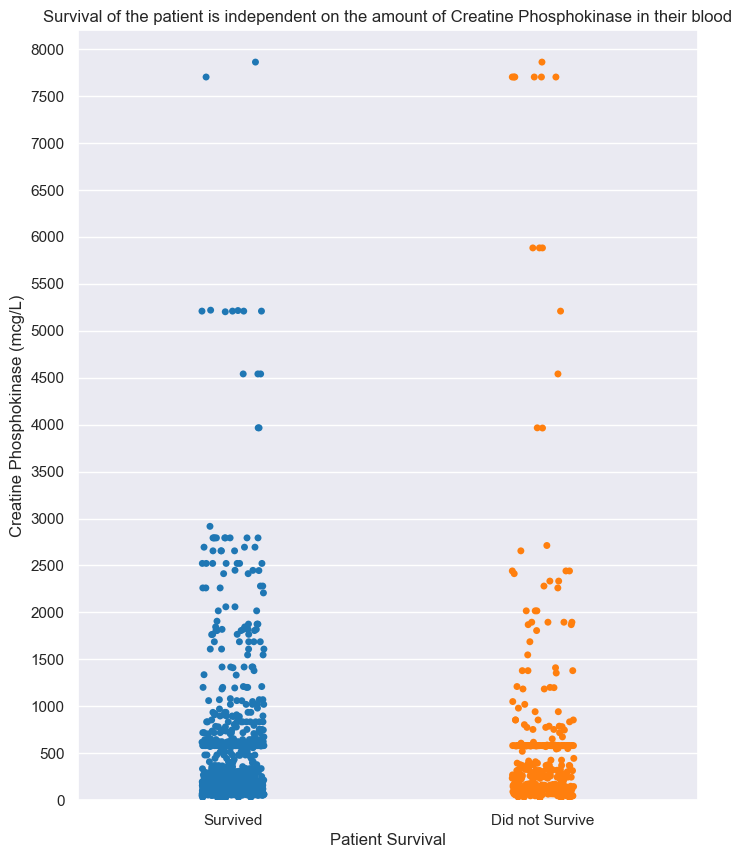

In [17]:
#cpk distribution
plt.figure(figsize=(8,10))
plt.title('Survival of the patient is independent on the amount of Creatine Phosphokinase in their blood')

sns.stripplot(heart_failure_df,y='creatinine_phosphokinase',x='DEATH_EVENT',hue='DEATH_EVENT',jitter=True,palette='tab10',legend=False)

plt.xlabel('Patient Survival')
plt.xticks([0,1],['Survived','Did not Survive'])

plt.ylabel('Creatine Phosphokinase (mcg/L)')
plt.yticks(range(0,8250,500))
plt.ylim(0,8200)

plt.show()


### What is Diabetes?
Diabetes is a condition that happens when your blood sugar (glucose) is too high. It develops when your pancreas doesn’t make enough insulin or any at all, or when your body isn’t responding to the effects of insulin properly.

### How much of our patients are Diabetic?

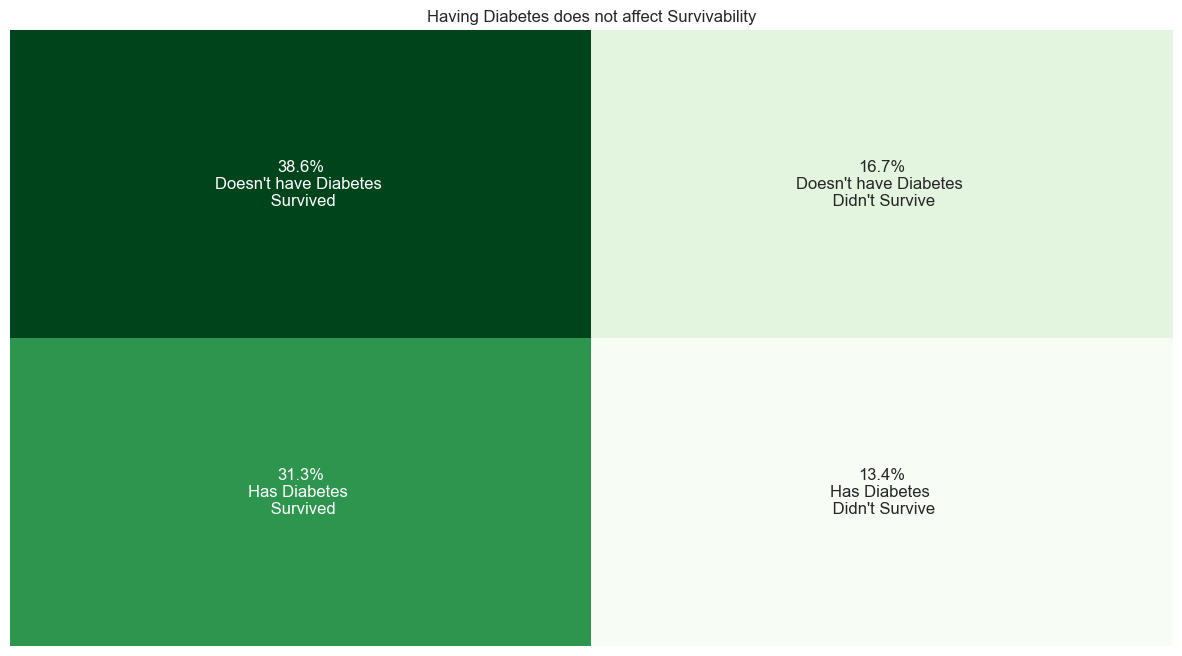

In [18]:
#diabetes distribution
diabetic_contingency_table=pd.crosstab(heart_failure_df['diabetes'],heart_failure_df['DEATH_EVENT']).copy()

annotations = [
    [
        '{:.1f}%\n{}'.format(diabetic_contingency_table.iloc[i, j] / diabetic_contingency_table.sum().sum() * 100,
                             categorize_values(diabetic_contingency_table.index[i], diabetic_contingency_table.columns[j],'Diabetes'))
        for j in range(len(diabetic_contingency_table.columns))
    ]
    for i in range(len(diabetic_contingency_table.index))
]

plt.figure(figsize=(15,8))
plt.title('Having Diabetes does not affect Survivability')

sns.heatmap(diabetic_contingency_table, annot=annotations, fmt='', cmap='Greens', cbar=False)

plt.xlabel('')
plt.xticks([])

plt.ylabel('')
plt.yticks([])

plt.show()

### What is ejection fraction?
Ejection fraction refers to how well your heart pumps blood.

### What is a normal ejection fraction?
Ejection fraction in a healthy heart is 50% to 70%. With each heartbeat, 50% to 70% of the blood in your left ventricle gets pumped out to your body.

In [19]:
heart_failure_df.groupby(['DEATH_EVENT']).describe()['ejection_fraction'].transpose()

DEATH_EVENT,False,True
count,923.000000,397.000000
mean,39.943662,33.088161
std,10.766355,11.968595
min,17.000000,14.000000
25%,35.000000,25.000000
50%,38.000000,30.000000
75%,45.000000,40.000000
max,80.000000,70.000000


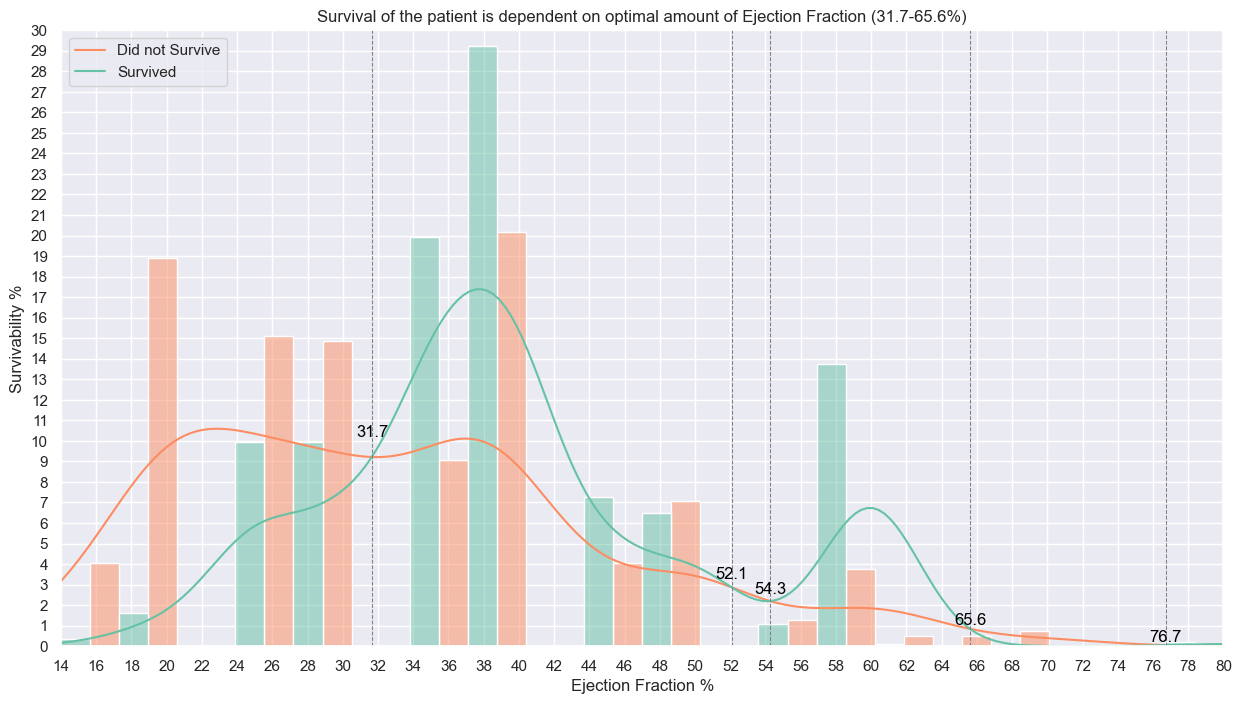

In [20]:
#ejection_fraction distribution
y_e_f_kde_scale = np.mean(heart_failure_df['ejection_fraction'])*9.5
x_ejection_fraction_intersection_points, y_ejection_fraction_intersection_points, e_f_kde_death_event_0, e_f_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'ejection_fraction', feature_kde_scale=y_e_f_kde_scale)

plt.figure(figsize=(15,8))
plt.title('Survival of the patient is dependent on optimal amount of Ejection Fraction (31.7-65.6%)')

sns.histplot(heart_failure_df,x='ejection_fraction',stat='percent',hue='DEATH_EVENT',palette='Set2',bins=20,kde=True,multiple='dodge',common_norm=False)

plt.xlabel('Ejection Fraction %')
plt.xticks(range(12,81,2))
plt.xlim(14,80)

plt.ylabel('Survivability %')
plt.yticks(range(0,31))
plt.ylim(0,30)

plt.legend(['Did not Survive','Survived'])

for i,x_ejection_fraction_point in enumerate(x_ejection_fraction_intersection_points):
    plt.axvline(x_ejection_fraction_point, color='gray', linestyle='--', linewidth=0.75)
    ef_y_0 = e_f_kde_death_event_0.evaluate(x_ejection_fraction_point)
    ef_y_1 = e_f_kde_death_event_1.evaluate(x_ejection_fraction_point)
    y_value = y_ejection_fraction_intersection_points[i]
    plt.text(x_ejection_fraction_point, y_value, f'{x_ejection_fraction_point:.1f}', color='black', rotation=0,va='bottom', ha='center')

plt.show()

### What is high blood pressure?
High blood pressure is when the force of blood pushing against your artery walls is consistently too high.

### How much of our patients have hypertension?

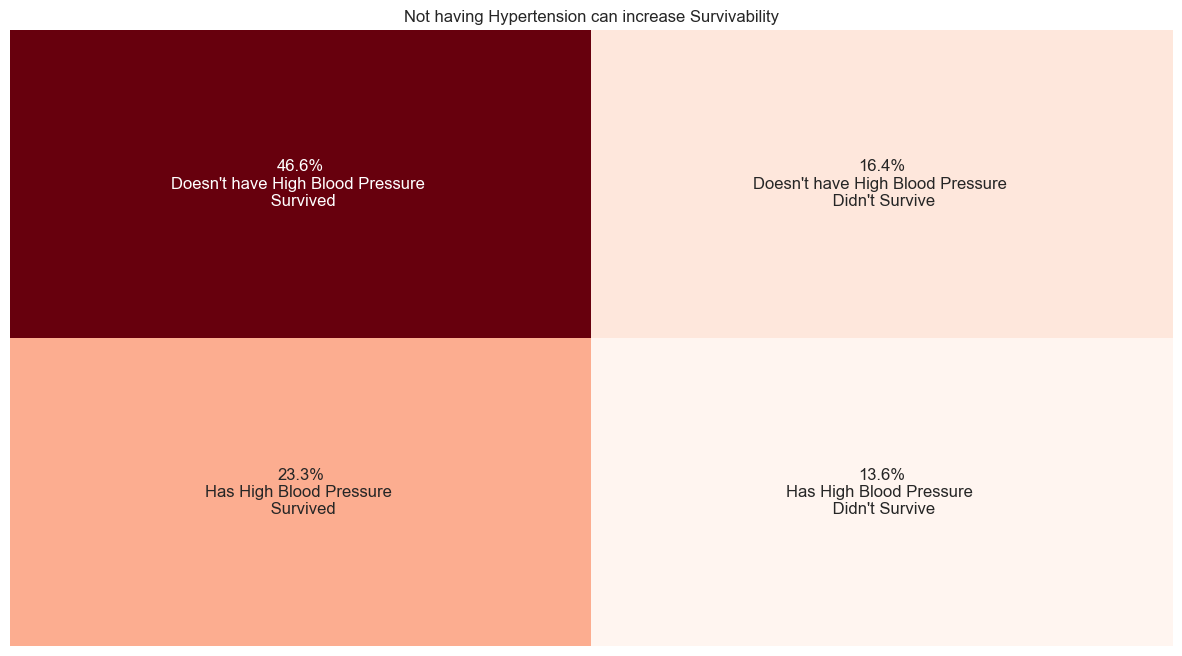

In [21]:
#hypertension distribution
hypertension_contingency_table=pd.crosstab(heart_failure_df['high_blood_pressure'],heart_failure_df['DEATH_EVENT']).copy()

annotations = [
    [
        '{:.1f}%\n{}'.format(hypertension_contingency_table.iloc[i, j] / hypertension_contingency_table.sum().sum() * 100,
                               categorize_values(hypertension_contingency_table.index[i], hypertension_contingency_table.columns[j],'High Blood Pressure'))
        for j in range(len(hypertension_contingency_table.columns))
    ]
    for i in range(len(hypertension_contingency_table.index))
]

plt.figure(figsize=(15,8))
plt.title('Not having Hypertension can increase Survivability')

sns.heatmap(hypertension_contingency_table, annot=annotations, fmt='', cmap='Reds', cbar=False)

plt.xlabel('')
plt.xticks([])

plt.ylabel('')
plt.yticks([])

plt.show()

### What are Platelets?
Platelets are the cells that circulate within our blood and bind together when they recognize damaged blood vessels.

### What is Normal platelet count range?
Normal platelet count ranges from 150,000 to 400,000 platelets/mL

In [22]:
heart_failure_df['platelets'].describe()

count      1320.000000
mean     263751.980303
std      106345.010150
min       25100.000000
25%      208000.000000
50%      263358.000000
75%      310000.000000
max      850000.000000
Name: platelets, dtype: float64

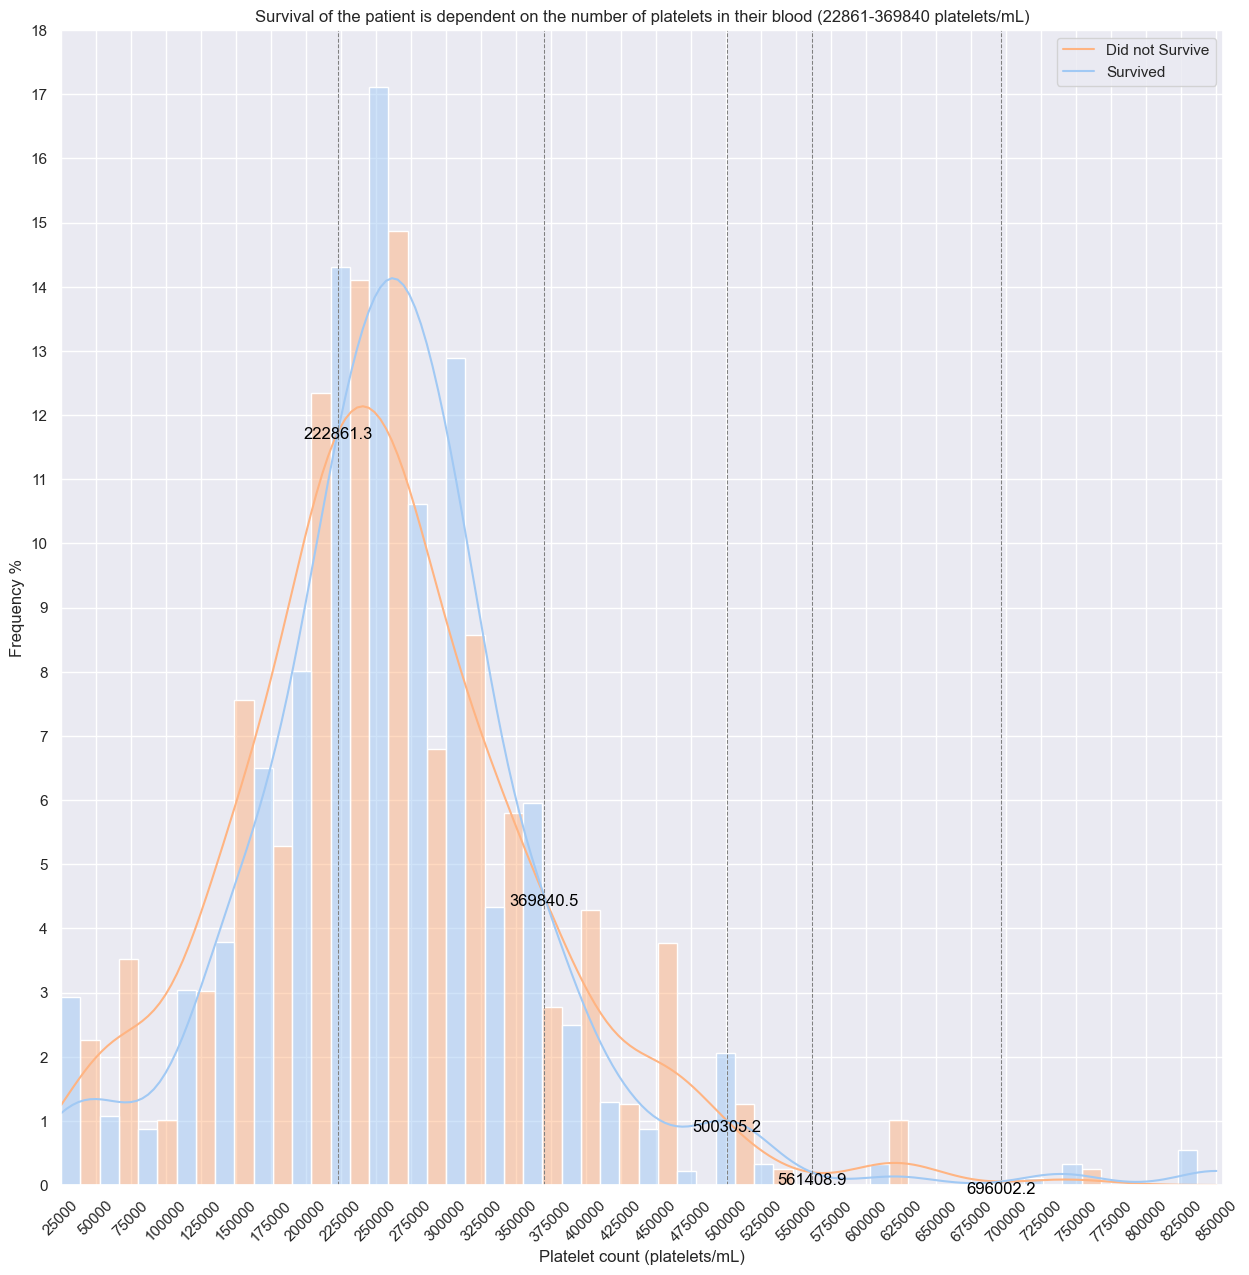

In [23]:
#platelets distribution
y_plt_kde_scale = np.mean(heart_failure_df['platelets'])*10.5
x_platelets_intersection_points, y_platelets_intersection_points, plt_kde_death_event_0, plt_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'platelets', feature_kde_scale=y_plt_kde_scale)

plt.figure(figsize=(15, 15))
plt.title('Survival of the patient is dependent on the number of platelets in their blood (22861-369840 platelets/mL)')

sns.histplot(data=heart_failure_df, x='platelets', hue='DEATH_EVENT',legend=True, stat='percent', kde=True, bins=30,multiple='dodge',common_norm=False)

plt.legend(['Did not Survive','Survived'])

plt.xlabel('Platelet count (platelets/mL)')
plt.xticks(range(25000,855000,25000),rotation=45)
plt.xlim(25000,855000)

plt.ylabel('Frequency %')
plt.yticks(range(0,19))
plt.ylim(0,18)

for i,x_plt_point in enumerate(x_platelets_intersection_points):
    plt.axvline(x_plt_point, color='gray', linestyle='--', linewidth=0.75)
    y_plt_point = y_platelets_intersection_points[i]
    plt.text(x_plt_point, y_plt_point, f'{x_plt_point:.1f}', color='black', rotation=0,va='top', ha='center')

plt.show()

### What is serum creatinine?
Creatinine is a waste product in your blood that comes from your muscles. Healthy kidneys filter creatinine out of your blood through your urine.

### What is a normal amount of Creatinine in blood?
Normal creatinine levels range from 0.9 to 1.3 mg/dL in men and 0.6 to 1.1 mg/dL in women who are 18 to 60 years old.

### What is the distribution of Creatinine in our patients?

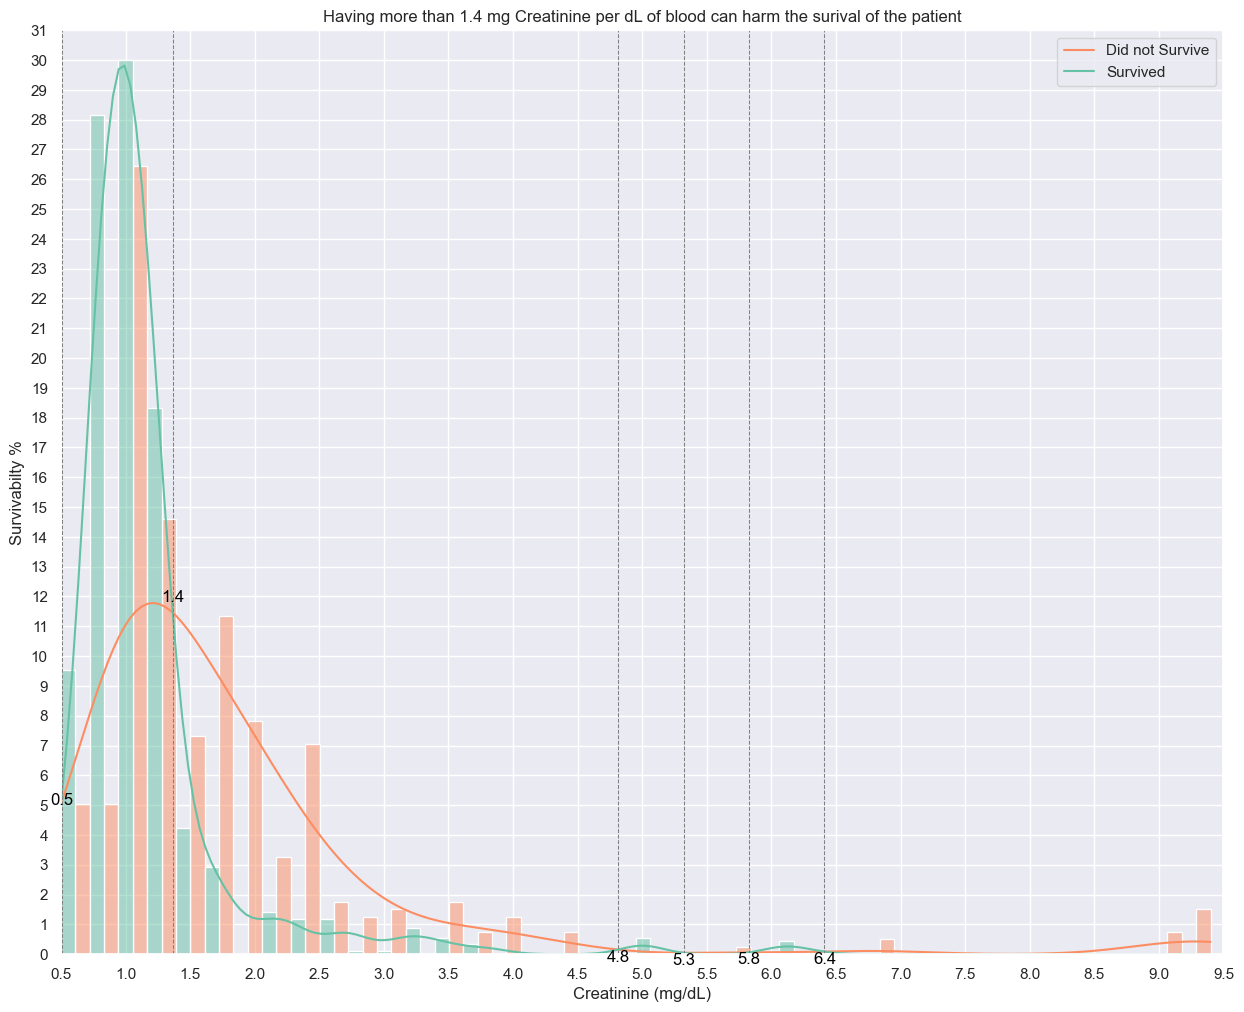

In [24]:
#serum_creatinine distribution
y_crt_kde_scale = np.mean(heart_failure_df['serum_creatinine'])*17.5
x_creatine_intersection_points, y_creatine_intersection_points, crt_kde_death_event_0, crt_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'serum_creatinine', feature_kde_scale=y_crt_kde_scale)

plt.figure(figsize=(15,12))
plt.title('Having more than 1.4 mg Creatinine per dL of blood can harm the surival of the patient')

sns.histplot(heart_failure_df,x='serum_creatinine',stat='percent',hue='DEATH_EVENT',palette='Set2',bins=40,kde=True,multiple='dodge',common_norm=False)

plt.legend(['Did not Survive','Survived'])

plt.xlabel('Creatinine (mg/dL)')
plt.xticks(np.arange(0.5,10,0.5))
plt.xlim(0.5,9.5)

plt.ylabel('Survivabilty %')
plt.yticks(range(0,32))
plt.ylim(0,31)

for i,x_crt_point in enumerate(x_creatine_intersection_points):
    plt.axvline(x_crt_point, color='gray', linestyle='--', linewidth=0.75)
    y_crt_point = y_creatine_intersection_points[i]
    plt.text(x_crt_point, y_crt_point, f'{x_crt_point:.1f}', color='black', rotation=0,va='top', ha='center')

plt.show()

### What is serum sodium?
Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. 

### What is a normal amount of Sodium in blood?
The reference range for serum sodium is 135-147 mEq/L

### What is the distribution of Sodium in our patients?

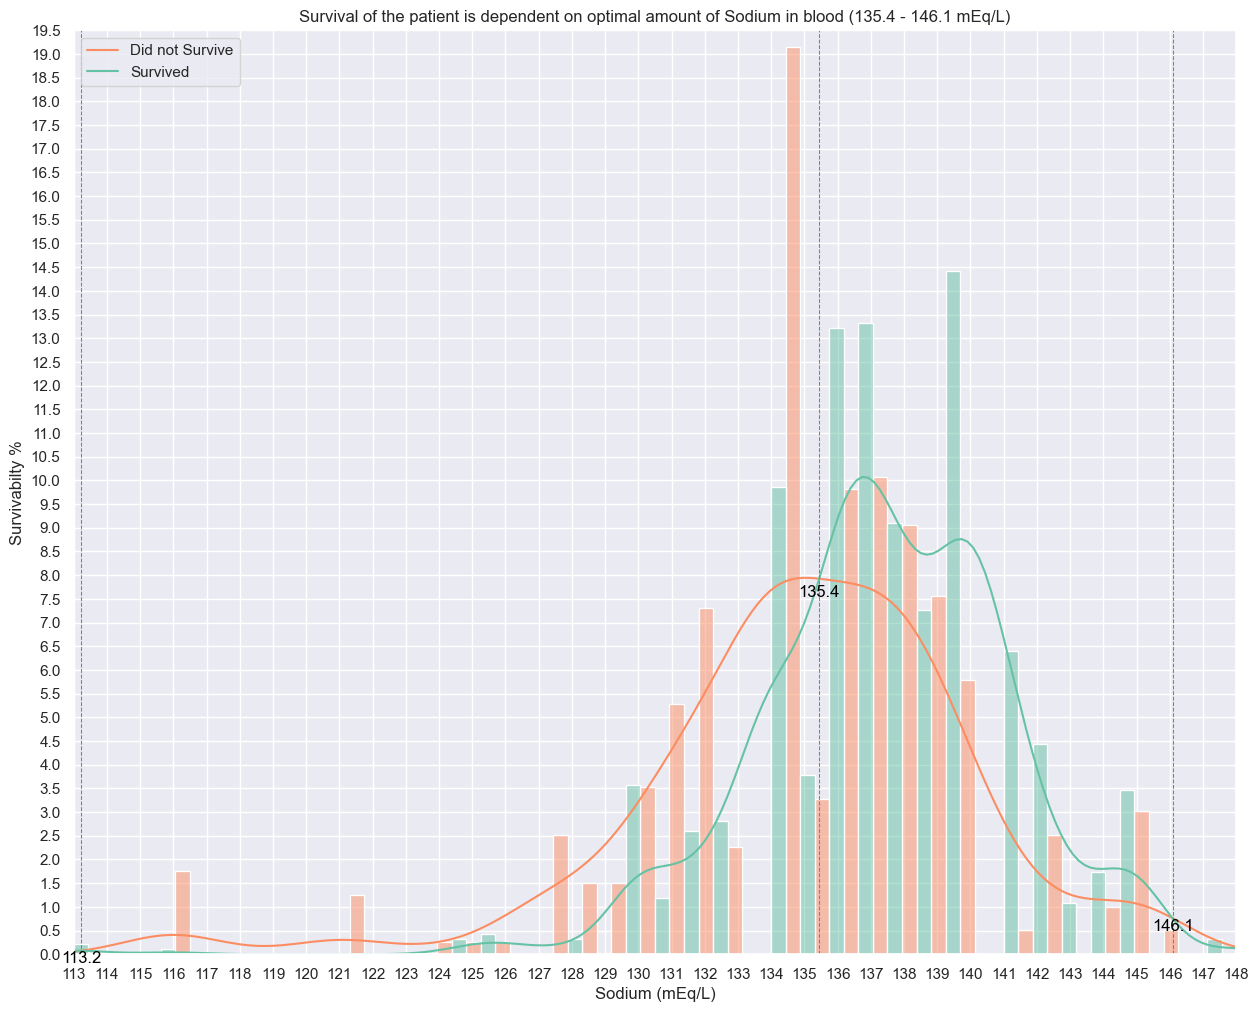

In [25]:
#serum_sodium distribution
y_sodium_kde_scale = np.mean(heart_failure_df['serum_sodium'])*0.63
x_sodium_intersection_points, y_sodium_intersection_points, sodium_kde_death_event_0, sodium_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'serum_sodium', feature_kde_scale=y_sodium_kde_scale)

plt.figure(figsize=(15,12))
plt.title('Survival of the patient is dependent on optimal amount of Sodium in blood (135.4 - 146.1 mEq/L)')

sns.histplot(heart_failure_df,x='serum_sodium',stat='percent',hue='DEATH_EVENT',palette='Set2',bins=40,kde=True,multiple='dodge',common_norm=False)

plt.legend(['Did not Survive','Survived'])

plt.xlabel('Sodium (mEq/L)')
plt.xticks(range(113,149))
plt.xlim(113,148)

plt.ylabel('Survivabilty %')
plt.yticks(np.arange(0,20,0.5))
plt.ylim(0,19.5)

for i,x_sodium_point in enumerate(x_sodium_intersection_points):
    plt.axvline(x_sodium_point, color='gray', linestyle='--', linewidth=0.75)
    y_sodium_point = y_sodium_intersection_points[i]
    plt.text(x_sodium_point, y_sodium_point, f'{x_sodium_point:.1f}', color='black', rotation=0,va='top', ha='center')

plt.show()

### What percentage of our patients smoke?

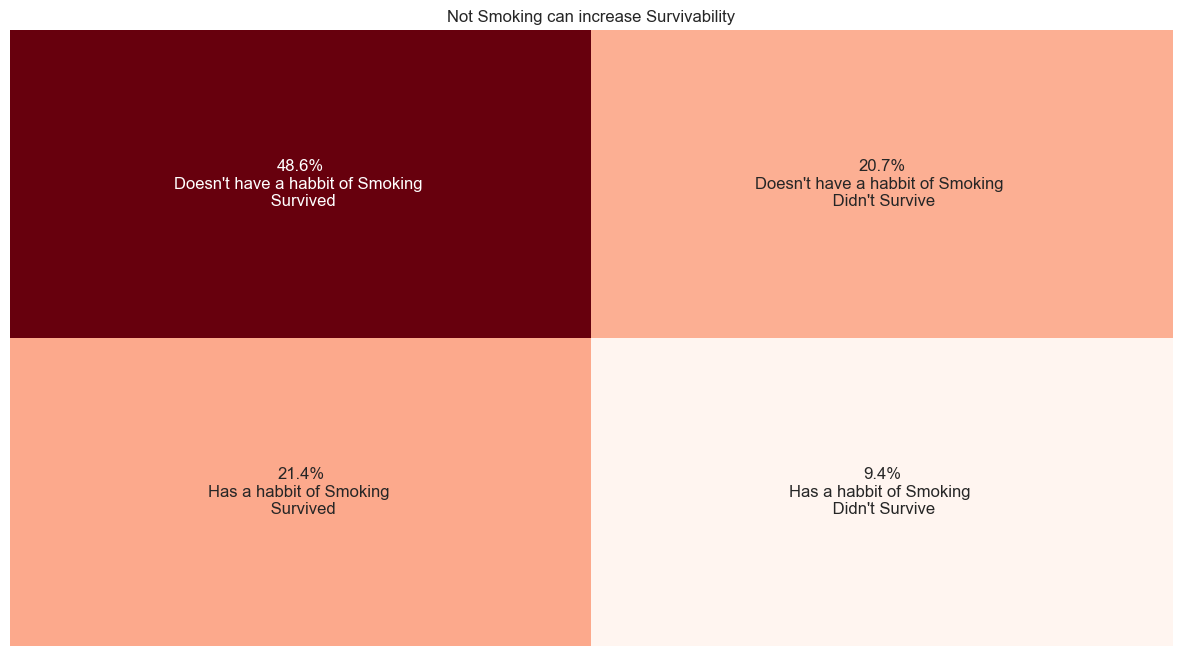

In [26]:
#smoking distribution
smoking_contingency_table=pd.crosstab(heart_failure_df['smoking'],heart_failure_df['DEATH_EVENT']).copy()

annotations = [
    [
        '{:.1f}%\n{}'.format(smoking_contingency_table.iloc[i, j] / smoking_contingency_table.sum().sum() * 100,
                             categorize_values(smoking_contingency_table.index[i], smoking_contingency_table.columns[j],'a habbit of Smoking'))
        for j in range(len(smoking_contingency_table.columns))
    ]
    for i in range(len(smoking_contingency_table.index))
]

plt.figure(figsize=(15,8))
plt.title('Not Smoking can increase Survivability')

sns.heatmap(smoking_contingency_table, annot=annotations, fmt='', cmap='Reds', cbar=False)

plt.xlabel('')
plt.xticks([])

plt.ylabel('')
plt.yticks([])

plt.show()

### How did the survivability change during the follow-up period?

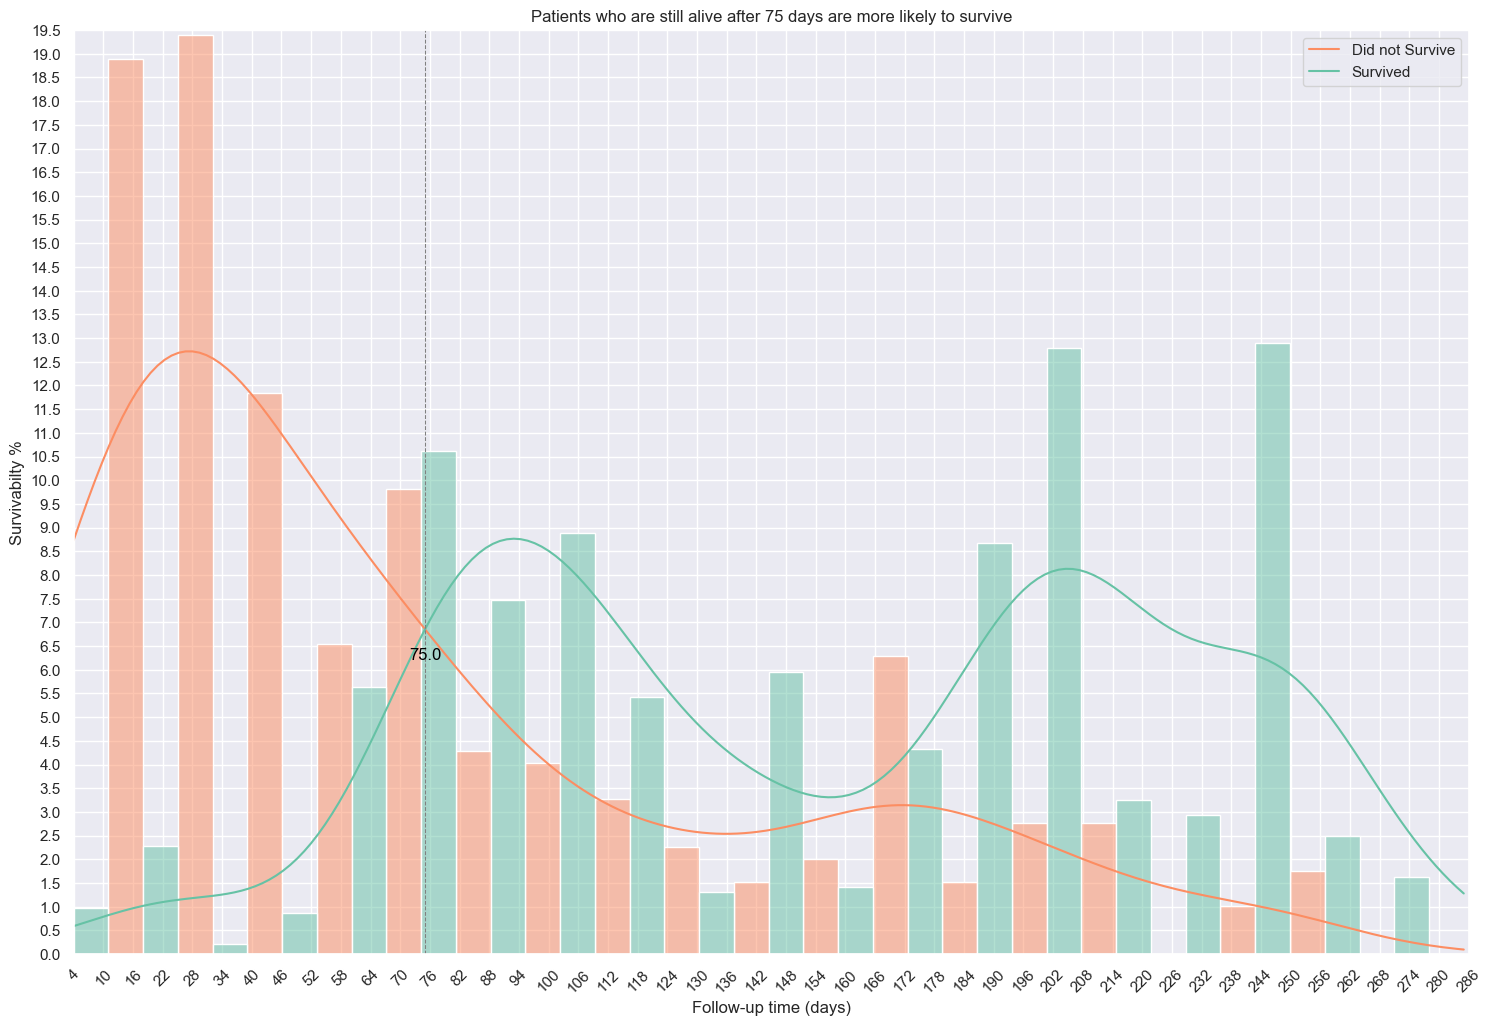

In [27]:
#follow-up distribution
y_time_kde_scale = np.mean(heart_failure_df['time'])*10
x_time_intersection_points, y_time_intersection_points, time_kde_death_event_0, time_kde_death_event_1 = find_kde_intersections(heart_failure_df, 'time', feature_kde_scale=y_time_kde_scale)

plt.figure(figsize=(18,12))
plt.title('Patients who are still alive after 75 days are more likely to survive')

sns.histplot(heart_failure_df,x='time',stat='percent',hue='DEATH_EVENT',palette='Set2',bins=20,kde=True,multiple='dodge',common_norm=False)

plt.legend(['Did not Survive','Survived'])

plt.xlabel('Follow-up time (days)')
plt.xticks(range(4,290,6),rotation=45)
plt.xlim(4,286)

plt.ylabel('Survivabilty %')
plt.yticks(np.arange(0,20,0.5))
plt.ylim(0,19.5)

for i,x_time_point in enumerate(x_time_intersection_points):
    plt.axvline(x_time_point, color='gray', linestyle='--', linewidth=0.75)
    y_time_point = y_time_intersection_points[i]
    plt.text(x_time_point, y_time_point, f'{x_time_point:.1f}', color='black', rotation=0,va='top', ha='center')

plt.show()

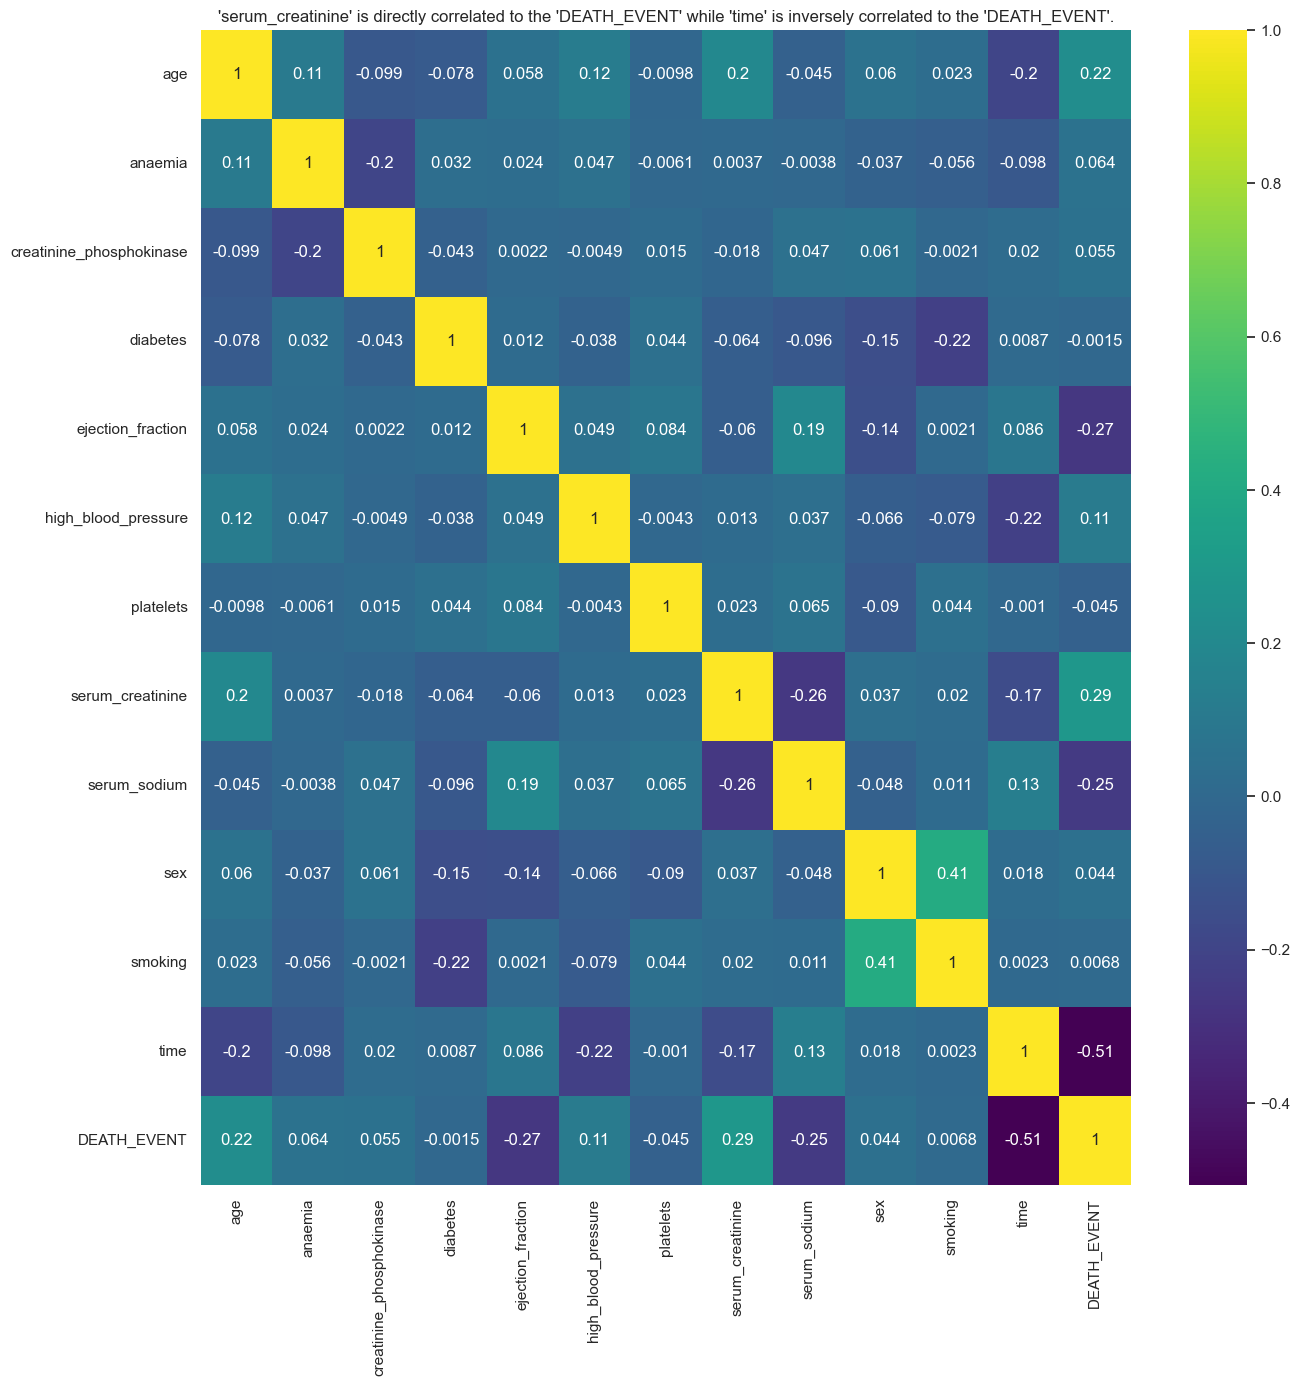

In [28]:
#correlation map
plt.figure(figsize=(15,15))
sns.heatmap(heart_failure_df.corr(), annot=True, cmap='viridis')
plt.title("'serum_creatinine' is directly correlated to the 'DEATH_EVENT' while 'time' is inversely correlated to the 'DEATH_EVENT'.")
plt.show()

In [29]:
heart_failure_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,60.580303,576.135606,37.881818,263751.980303,1.356447,136.665909,132.678788
std,11.913687,970.630878,11.572547,106345.010150,0.998924,4.380990,77.779493
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,50.000000,115.000000,30.000000,208000.000000,0.900000,134.000000,74.000000
50%,60.000000,249.000000,38.000000,263358.000000,1.100000,137.000000,119.500000
75%,69.000000,582.000000,45.000000,310000.000000,1.300000,140.000000,206.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,285.000000


### Principal Component Analysis (PCA)

#### Standardising Dataframe

In [30]:
heart_failure_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Here, we have columns with continous data and columns with discrete data. We need only standardise the continous data columns. Those columns are:
 * age
 * creatinine_phosphokinase
 * ejection_fraction
 * platelets
 * serum_creatinine
 * serum_sodium
 * time

In [31]:
scaler=StandardScaler()
scaler.fit(heart_failure_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']])

StandardScaler()

In [32]:
scaled_continuous_data=scaler.transform(heart_failure_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']])
scaled_continuous_df=pd.DataFrame(scaled_continuous_data,columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])
scaled_data=pd.concat([scaled_continuous_df,heart_failure_df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']].reset_index(drop=True)],axis=1)

In [33]:
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [34]:
heart_pca=pca.transform(scaled_data)
scaled_data.shape

(1320, 13)

In [35]:
heart_pca.shape

(1320, 2)

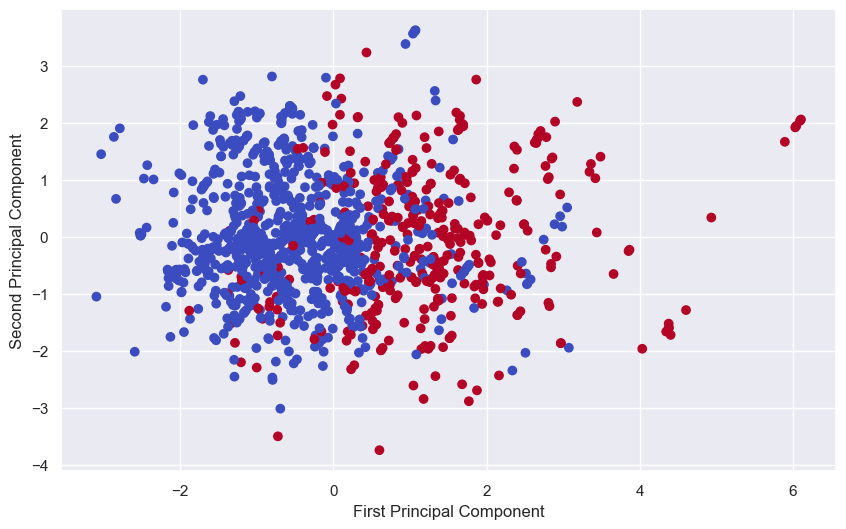

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(heart_pca[:,0],heart_pca[:,1],c=heart_failure_df['DEATH_EVENT'],cmap=plt.get_cmap('coolwarm'))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [37]:
pca.components_

array([[ 0.37723242, -0.12145412, -0.2767938 , -0.0837552 ,  0.50816377,
        -0.47318086, -0.47527544,  0.0414258 , -0.00925106,  0.04729083,
         0.03373248,  0.00450212,  0.21471218],
       [ 0.52315759, -0.22581121,  0.60544019,  0.36521377,  0.09276641,
         0.34306636, -0.18401163,  0.07057741, -0.02373372,  0.07593308,
        -0.05931728,  0.00991898, -0.01699637]])

In [38]:
heart_failure_df_comp=pd.DataFrame(pca.components_,columns=scaled_data.columns)
heart_failure_df_comp

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0.377232,-0.121454,-0.276794,-0.083755,0.508164,-0.473181,-0.475275,0.041426,-0.009251,0.047291,0.033732,0.004502,0.214712
1,0.523158,-0.225811,0.605440,0.365214,0.092766,0.343066,-0.184012,0.070577,-0.023734,0.075933,-0.059317,0.009919,-0.016996


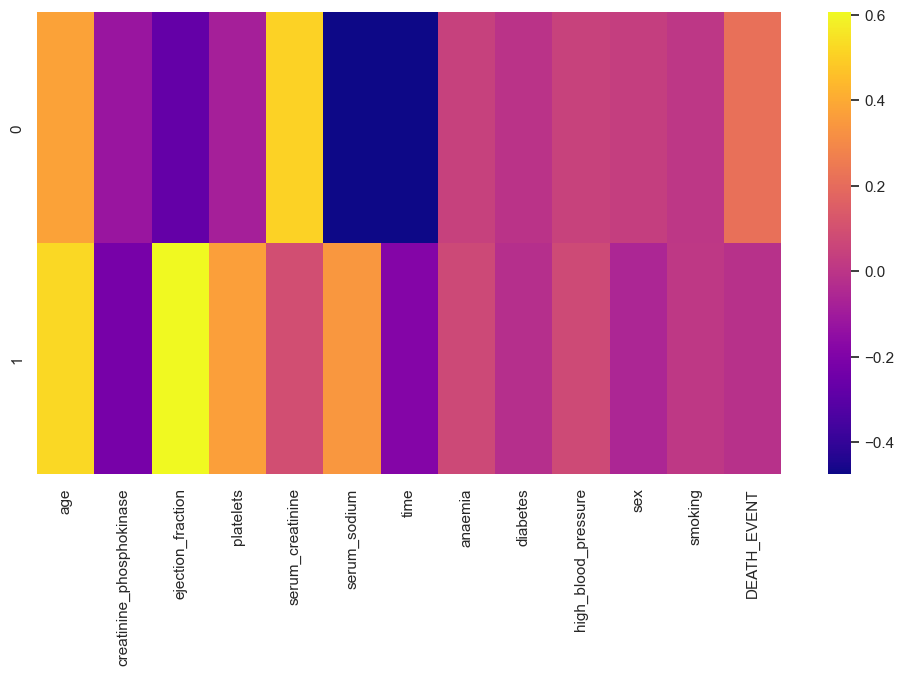

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(heart_failure_df_comp,cmap='plasma')
plt.show()

From this we can understand that Sex, Smoking, Serum_Creatinine and Age play a major role in the heart organ failure.

## Supervised Learning

In [40]:
X=scaled_data.drop(['DEATH_EVENT'],axis=1).copy()
y=scaled_data['DEATH_EVENT'].copy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=101)

In [41]:
label_encoder=LabelEncoder()

y_train_encoded=label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)

### Logistic Regression

In [42]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train_encoded)

LogisticRegression()

In [43]:
log_predictions=log_model.predict(X_test)
print(classification_report(y_test_encoded,log_predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       326
           1       0.79      0.60      0.68       136

    accuracy                           0.84       462
   macro avg       0.82      0.77      0.79       462
weighted avg       0.83      0.84      0.83       462



In [44]:
print(confusion_matrix(y_test_encoded,log_predictions))

[[304  22]
 [ 54  82]]


In [45]:
log_accuracy=accuracy_score(y_test_encoded, log_predictions)
print(log_accuracy)

0.8354978354978355


### K-Nearest Neighbour

#### Chosing a K value

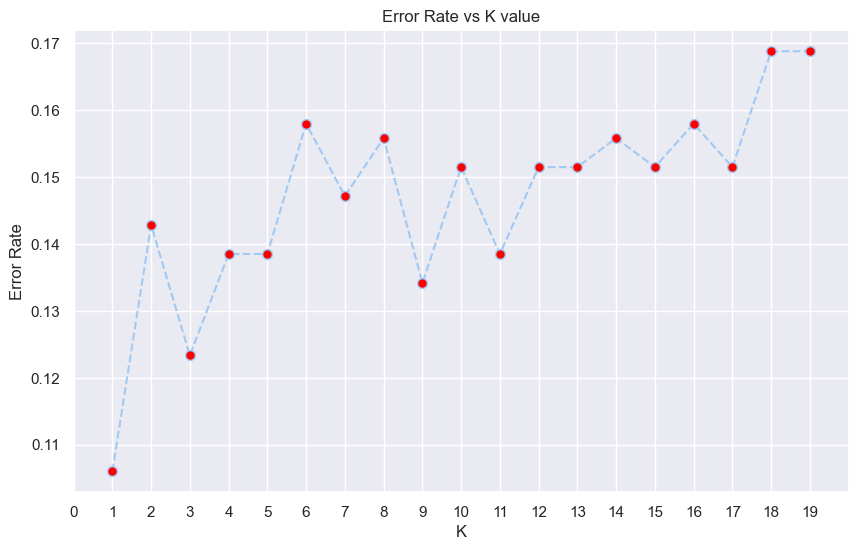

In [46]:
error_rate=[]
for i in range (1,20):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train_encoded)
    pred_i=knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test_encoded))
    
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K value')

plt.plot(range(1,20),error_rate,color='b',linestyle='--',marker='o',markerfacecolor='red',markersize=7)

plt.xlabel('K')
plt.xlim(0,20)
plt.xticks(range(0,20,1))

plt.ylabel('Error Rate')

plt.show()

In [47]:
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train_encoded)

KNeighborsClassifier(n_neighbors=2)

In [48]:
knn_predictions=knn_model.predict(X_test)
print(classification_report(y_test_encoded,knn_predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       326
           1       0.91      0.57      0.70       136

    accuracy                           0.86       462
   macro avg       0.88      0.77      0.80       462
weighted avg       0.86      0.86      0.85       462



In [49]:
print(confusion_matrix(y_test_encoded,knn_predictions))

[[318   8]
 [ 58  78]]


In [50]:
knn_accuracy=accuracy_score(y_test_encoded, knn_predictions)
print(knn_accuracy)

0.8571428571428571


### Support Vector Machines (SVM)

In [51]:
svc_model=SVC(class_weight='balanced', random_state=42)
svc_model.fit(X_train,y_train_encoded)

SVC(class_weight='balanced', random_state=42)

In [52]:
svc_predictions=svc_model.predict(X_test)
print(classification_report(y_test_encoded,svc_predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       326
           1       0.77      0.82      0.79       136

    accuracy                           0.87       462
   macro avg       0.84      0.86      0.85       462
weighted avg       0.88      0.87      0.87       462



In [53]:
print(confusion_matrix(y_test_encoded,svc_predictions))

[[292  34]
 [ 25 111]]


In [54]:
svc_accuracy=accuracy_score(y_test_encoded, svc_predictions)
print(svc_accuracy)

0.8722943722943723


#### SVC with SMOTE

In [55]:
smote = SMOTE(random_state=101)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train_encoded)
svc_model_new = SVC(random_state=101)
svc_model_new.fit(X_train_res,y_train_res)

SVC(random_state=101)

In [56]:
svc_predictions_new = svc_model_new.predict(X_test)
print(classification_report(y_test_encoded,svc_predictions_new))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       326
           1       0.79      0.86      0.82       136

    accuracy                           0.89       462
   macro avg       0.87      0.88      0.87       462
weighted avg       0.90      0.89      0.89       462



In [57]:
print(confusion_matrix(y_test_encoded,svc_predictions_new))

[[295  31]
 [ 19 117]]


In [58]:
svc_accuracy_new=accuracy_score(y_test_encoded, svc_predictions_new)
print(svc_accuracy_new)

0.8917748917748918


#### Grid-search SVM

In [59]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid_model=GridSearchCV(SVC(),param_grid,verbose=3)
grid_model.fit(X_train,y_train_encoded)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.692 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.698 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.698 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.696 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.696 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.831 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.773 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.837 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.778 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.836 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.698 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [60]:
grid_model.best_params_

{'C': 100, 'gamma': 0.1}

In [61]:
grid_predictions=grid_model.predict(X_test)
print(classification_report(y_test_encoded,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       326
           1       0.86      0.79      0.82       136

    accuracy                           0.90       462
   macro avg       0.88      0.87      0.87       462
weighted avg       0.90      0.90      0.90       462



In [62]:
print(confusion_matrix(y_test_encoded,grid_predictions))

[[308  18]
 [ 29 107]]


In [63]:
grid_accuracy=accuracy_score(y_test_encoded, grid_predictions)
print(grid_accuracy)

0.8982683982683982


### K-Means Clustering

In [64]:
kmeans_model=KMeans(n_clusters=2,n_init=50)
kmeans_model.fit(X)

KMeans(n_clusters=2, n_init=50)

In [65]:
print(confusion_matrix(y,kmeans_model.labels_))

[[209 714]
 [322  75]]


In [66]:
print(classification_report(y,kmeans_model.labels_))

              precision    recall  f1-score   support

       False       0.39      0.23      0.29       923
        True       0.10      0.19      0.13       397

    accuracy                           0.22      1320
   macro avg       0.24      0.21      0.21      1320
weighted avg       0.30      0.22      0.24      1320



In [67]:
kmeans_accuracy=accuracy_score(y, kmeans_model.labels_)
print(kmeans_accuracy)

0.21515151515151515


### Decision Tree Model

In [68]:
dtree_model=DecisionTreeClassifier()
dtree_model.fit(X_train,y_train_encoded)

DecisionTreeClassifier()

In [69]:
dtree_prediction=dtree_model.predict(X_test)
print(classification_report(y_test_encoded,dtree_prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       326
           1       0.87      0.85      0.86       136

    accuracy                           0.92       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.92      0.92      0.92       462



In [70]:
print(confusion_matrix(y_test_encoded,dtree_prediction))

[[309  17]
 [ 21 115]]


In [71]:
dtree_accuracy=accuracy_score(y_test_encoded, dtree_prediction)
print(dtree_accuracy)

0.9177489177489178


### Random Forest Classifier

In [72]:
rfc_model=RandomForestClassifier(n_estimators=250)
rfc_model.fit(X_train,y_train_encoded)

RandomForestClassifier(n_estimators=250)

In [73]:
rfc_prediction=rfc_model.predict(X_test)
print(classification_report(y_test_encoded,rfc_prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       326
           1       0.96      0.85      0.90       136

    accuracy                           0.95       462
   macro avg       0.95      0.92      0.93       462
weighted avg       0.95      0.95      0.94       462



In [74]:
print(confusion_matrix(y_test_encoded,rfc_prediction))

[[321   5]
 [ 20 116]]


In [75]:
rfc_accuracy=accuracy_score(y_test_encoded, rfc_prediction)
print(rfc_accuracy)

0.9458874458874459


### Naive Bayes

In [76]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train_encoded)

GaussianNB()

In [77]:
nb_prediction=nb_model.predict(X_test)
print(classification_report(y_test_encoded,nb_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       326
           1       0.74      0.43      0.54       136

    accuracy                           0.79       462
   macro avg       0.77      0.68      0.70       462
weighted avg       0.78      0.79      0.77       462



In [78]:
print(confusion_matrix(y_test_encoded,nb_prediction))

[[306  20]
 [ 78  58]]


In [79]:
nb_accuracy=accuracy_score(y_test_encoded, nb_prediction)
print(nb_accuracy)

0.7878787878787878


### XGBoost

In [80]:
xgb_train=xgb.DMatrix(X_train,label=y_train_encoded)
xgb_test=xgb.DMatrix(X_test,label=y_test_encoded)

In [81]:
num_round=100
parameters={
     'max_depth':6,
     'eta':0.3,
     'objective':'binary:logistic',
     'eval_metric':'logloss'
     }
watchlist=[(xgb_train,'train'),(xgb_test,'eval')]
xgb_model=xgb.train(params=parameters,dtrain=xgb_train,num_boost_round=num_round,evals=watchlist,early_stopping_rounds=10)

[0]	train-logloss:0.44851	eval-logloss:0.45720
[1]	train-logloss:0.35219	eval-logloss:0.38095
[2]	train-logloss:0.28342	eval-logloss:0.32593
[3]	train-logloss:0.23496	eval-logloss:0.28596
[4]	train-logloss:0.20021	eval-logloss:0.26613
[5]	train-logloss:0.17340	eval-logloss:0.24369
[6]	train-logloss:0.15493	eval-logloss:0.22966
[7]	train-logloss:0.13833	eval-logloss:0.21883
[8]	train-logloss:0.12633	eval-logloss:0.21169
[9]	train-logloss:0.11031	eval-logloss:0.19492
[10]	train-logloss:0.09720	eval-logloss:0.18491
[11]	train-logloss:0.08981	eval-logloss:0.18255
[12]	train-logloss:0.08478	eval-logloss:0.17965
[13]	train-logloss:0.07801	eval-logloss:0.17493
[14]	train-logloss:0.07219	eval-logloss:0.17006
[15]	train-logloss:0.06807	eval-logloss:0.16679
[16]	train-logloss:0.06527	eval-logloss:0.16556
[17]	train-logloss:0.06062	eval-logloss:0.16149
[18]	train-logloss:0.05792	eval-logloss:0.16016
[19]	train-logloss:0.05480	eval-logloss:0.15883
[20]	train-logloss:0.05157	eval-logloss:0.15518
[2

In [82]:
xgb_prediction_prob=xgb_model.predict(xgb_test)
xgb_prediction=(xgb_prediction_prob > 0.5).astype(int)
print(classification_report(y_test_encoded,xgb_prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       326
           1       0.95      0.89      0.92       136

    accuracy                           0.95       462
   macro avg       0.95      0.94      0.94       462
weighted avg       0.95      0.95      0.95       462



In [83]:
print(confusion_matrix(y_test_encoded,xgb_prediction))

[[320   6]
 [ 15 121]]


In [84]:
xgb_accuracy=accuracy_score(y_test_encoded, xgb_prediction)
print(xgb_accuracy)

0.9545454545454546


## So to recap, we used supervised learning to predict the probability of a patient's death occuring. We used the following methods to do it.

* Naive Bayes Classifier
* K-Nearest Neighbour
* Logistic Regression
* Random Forest Classifier
* Support Vector Machines (SVM)
* Support Vector Machines (SVM) using Synthetic Minority Oversampling Technique (SMOTE)
* Support Vector Machines (SVM) using GridSearchCV
* K-Means Clustering
* Decision Tree Model
* XGBoost Classifier

In [85]:
prediction_accuracies={
    nb_accuracy:"Gaussian Naive Bayes Classifier",
    knn_accuracy:"K-Nearest Neighbour Classifier",
    log_accuracy:"Logistic Regression Model",
    rfc_accuracy:"Random Forest Classifier",
    svc_accuracy:"Support Vector Machines (SVM)",
    svc_accuracy_new:"Support Vector Machines (SVM) using Synthetic Minority Oversampling Technique (SMOTE)",
    grid_accuracy:"Support Vector Machines (SVM) using GridSearchCV",
    dtree_accuracy:"Decision Tree Model",
    kmeans_accuracy:"K-Means Clustering",
    xgb_accuracy:'XGBoost Classifier'
}
max_accuracy=max(prediction_accuracies)
most_accurate_model=prediction_accuracies[max_accuracy]
print(f'The Most accurate model is {most_accurate_model} with {round(max_accuracy*100,2)}% accuracy')

The Most accurate model is XGBoost Classifier with 95.45% accuracy
